# COVID-19 transmission

2019 Novel Coronavirus (2019-nCoV) is a RNA virus. It is a new virus, because of that every person has a chance to be infected. The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

## Basic acpects analyzed in work
1. How many cases we have in worldwide?
2. Which 5 countries are most affected?
3. How looks growth of death cases in those countries?
4. What is currently situation in Lithuania?

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# First of all, I am imoprting csv file and checking data which I have.
virus_data=pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
virus_data.head()


In [ ]:
# dropping columns which are not useful for my analysis. It is SNo, Province/State
virus_data = virus_data.drop(columns = ['Last Update', 'SNo', 'Province/State'])
for_baltics = virus_data.copy()
virus_data

In [ ]:
# Creating a new column for active cases. It show as number of cases minus deaths and recovered cases. It let's us analize 
# every country deals with COVID-19. 

virus_data['Active cases'] = virus_data['Confirmed'] - virus_data['Deaths'] - virus_data['Recovered']
virus_data

In [ ]:
# After data preparation I am checking if there are empty rows. From results we can conclude that all filled with data.
# In active cases column we can see that min active cases is -164015. US reports recovered cases as cummulative number.
# So it means that in US now it is recovered 164015, but it doesn't mean that those people recovered the last day.
# Also from data we can see that 75 % of confirmed cases is down to 855.

virus_data.describe()

In [ ]:
# Taking from data only last day results for evaluating currently situation. Grouping by country to know how many cases
# in every country we have.

by_date = virus_data[virus_data['ObservationDate']==virus_data.iloc[-1,0]]

# Calculating sum of cases, deaths and recover cases in all world

In [ ]:
# Summing cases of each category worldwide.

conf_world = int(by_date['Confirmed'].sum())
death_world = int(by_date['Deaths'].sum())
recov_world = int(by_date['Recovered'].sum())
active_cases = int(by_date['Active cases'].sum())

In [ ]:
# Ploting results of confirmed, active cases, recovered, deaths categories.

names=['Confirmed', ' Active cases', 'Recovered', 'Deaths']
variables = [conf_world, active_cases, recov_world, death_world]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(names, variables)
plt.title('COVID-19 cases', fontsize=16)
plt.ylabel('Number of cases')
plt.show()

# From results we can see that confirmed cases is near 3.5 million limit. Active cases is about 2 million.

In [ ]:

# Printing results of worldwide cases.
print('Confirmed cases: {}'.format(conf_world))
print('Active cases: {}'.format(active_cases))
print('Death cases: {}'.format(death_world))
print('Recovered: {}'.format(recov_world))

# Choosing TOP5 countries by active cases

In [ ]:
# Now moving from worldwide view to countries. First line of code grouping coutries and summing last day results.
by_country = by_date.groupby(by=['Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()

# Visual presentation of cases.
colored = by_country.style.background_gradient(cmap='Reds')
colored

In [ ]:
# taking last day data and choosing countries which have biggest number of active cases.
# Few insights:
# 1. In UK there we can see very low recovery rate. It could be because of not confirmed order when and how confirm full recovery.
# 2. In Russia death cases is 24 times less than in Italy which have same number of active cases like Russia. It could be 
# that Russia not taking test after patiets die. 

most_affected = by_country.sort_values(['Active cases'], ascending = False).head()
most_affected

In [ ]:
# Creating a new table with every category percentegies taking confirmed cases as 100 %. 
most_affected_perc = most_affected.copy()
most_affected_perc['Active, %'] = most_affected_perc['Active cases'] * 100 / most_affected_perc['Confirmed']
most_affected_perc['Recovered, %'] = most_affected_perc['Recovered'] * 100 / most_affected_perc['Confirmed']
most_affected_perc['Death, %'] = most_affected_perc['Deaths'] * 100 / most_affected_perc['Confirmed']
most_affected_perc = most_affected_perc.drop(['Confirmed', 'Deaths', 'Recovered', 'Active cases'], axis = 1)
most_affected_perc = most_affected_perc.T
most_affected_perc = round(most_affected_perc,2)

In [ ]:
# Picking size of plot and taking variables for bar chart
f, ax = plt.subplots(figsize=(8,4))
active_cases = most_affected['Deaths']
recovered = most_affected['Recovered']
deaths = most_affected['Confirmed']

# Number of all most affected countries
N = 5

 # Position of every of 5 country
number = np.arange(N) 

# The width of bars
width = 0.45 

# Ploting every category one by one
p1 = ax.bar(number, deaths, width)
p2 = ax.bar(number, recovered, width)
p3 = ax.bar(number, active_cases, width)

# The main information about graph
plt.ylabel('Number of cases')
plt.title('Most affected countries by active cases', fontsize = 16)
plt.xticks([])
plt.legend((p1[0], p2[0], p3[0]), ('Active cases', 'Recovered', 'Deaths'))

# Adding table of percentages bellow main graph
data = most_affected_perc.values
columns = most_affected_perc.columns
rows = ['Active, %', 'Recovered, %', 'Death, %']
the_table = plt.table(cellText = data, rowLabels = rows, colLabels = columns, cellLoc = 'center', loc = 'bottom')
plt.subplots_adjust(hspace=0.7)

plt.show()

# Cases in most affected countries by time

In [ ]:
# For better visualisations, it is valueable convert ObservationDate from string to datetime. Also date set as index.
virus_data ['ObservationDate']= pd.to_datetime(virus_data['ObservationDate'])
virus_data.set_index('ObservationDate', inplace = True)

In [ ]:
# Taking most affected countries. Although China is not in most affected countries by cases, but I am taking data from 
# this country because it was first affected and it is a good model for future predictions for other countries. 
# Also later I will visualize Lithuania data set, so now I also preparing and our coutry dataset.

china_data = virus_data.loc[virus_data['Country/Region']=='Mainland China']
lithuania_data = virus_data.loc[virus_data['Country/Region']=='Lithuania']
first_data = virus_data.loc[virus_data['Country/Region']== most_affected.index[0]]
secound_data = virus_data.loc[virus_data['Country/Region']== most_affected.index[1]]
third_data = virus_data.loc[virus_data['Country/Region']== most_affected.index[2]]
fourth_data = virus_data.loc[virus_data['Country/Region']== most_affected.index[3]]
fifth_data = virus_data.loc[virus_data['Country/Region']==  most_affected.index[4]]

In [ ]:
# Taking sum of cases for each day.

china_data = china_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()
first_data = first_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()
secound_data = secound_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()
third_data = third_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()
fourth_data = fourth_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()
fifth_data = fifth_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()
lithuania_data = lithuania_data.groupby(by=['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active cases'].sum()

In [ ]:
fig = make_subplots(rows=3, cols=2,
                       subplot_titles=('China', most_affected.index[0], most_affected.index[1], most_affected.index[2],
                                       most_affected.index[3], most_affected.index[4]))


fig.add_trace(go.Bar(x = china_data.index, y = china_data['Active cases']), 1, 1)
fig.add_trace(go.Bar(x = first_data.index, y = first_data['Active cases']), 1, 2)
fig.add_trace(go.Bar(x = secound_data.index, y = secound_data['Active cases']), 2, 1)
fig.add_trace(go.Bar(x = third_data.index, y = third_data['Active cases']), 2, 2)
fig.add_trace(go.Bar(x = fourth_data.index, y = fourth_data['Active cases']), 3, 1)
fig.add_trace(go.Bar(x = fifth_data.index, y = fifth_data['Active cases']), 3, 2)



fig.update_layout(height=1000, width=1000, title_text='Active cases in most affected countries', showlegend=False)
fig.show()

# Few insights:
# 1. China february 13: added new confirmation test for COVID-19. Read more: 
# https://www.worldometers.info/coronavirus/how-to-interpret-feb-12-case-surge/
# 2. Only in China active cases decresed. In US, UK and Russia active cases still rising. It is suspected
# that France and Italy reached Plateau phase of logistic growth.

In [ ]:
# Calculating moving average of most affected countries. Moving average shows The moving average is mostly 
#used with time series data to capture the short-term fluctuations while focusing on longer trends.

#Moving average interval choosen for a week. And data are taking
# from that point when death cases is 3 or more. 
# First code line sorts 3 or more death cases. Secound code line is calculating moving average.


china_data = china_data[china_data['Deaths']>=3]
china_data['Moving average of deaths'] = china_data.iloc[:, 1].rolling(window = 7).mean()

first_data = first_data[first_data['Deaths']>=3]
first_data['Moving average of deaths'] = first_data.iloc[:, 1].rolling(window = 7).mean()

secound_data = secound_data[secound_data['Deaths']>=3]
secound_data['Moving average of deaths'] = secound_data.iloc[:, 1].rolling(window = 7).mean()

third_data = third_data[third_data['Deaths']>=3]
third_data['Moving average of deaths'] = third_data.iloc[:, 1].rolling(window = 7).mean()

fourth_data = fourth_data[fourth_data['Deaths']>=3]
fourth_data['Moving average of deaths'] = fourth_data.iloc[:, 1].rolling(window = 7).mean()

fifth_data = fifth_data[fifth_data['Deaths']>=3]
fifth_data['Moving average of deaths'] = fifth_data.iloc[:, 1].rolling(window = 7).mean()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Line(x = china_data.index, y = china_data['Moving average of deaths'], name = 'China' ))
fig.add_trace(go.Line(x = first_data.index, y = first_data['Moving average of deaths'], name = most_affected.index[0]))
fig.add_trace(go.Line(x = secound_data.index, y = secound_data['Moving average of deaths'], name = most_affected.index[1]))
fig.add_trace(go.Line(x = third_data.index, y = third_data['Moving average of deaths'], name = most_affected.index[2]))
fig.add_trace(go.Line(x = fourth_data.index, y = fourth_data['Moving average of deaths'], name = most_affected.index[3]))
fig.add_trace(go.Line(x = fifth_data.index, y = fifth_data['Moving average of deaths'], name = most_affected.index[4]))

fig.update_layout(height = 500, width = 500, title_text='Week moving avg. of deaths in most affected countries', 
                  xaxis_title = 'Date',
                  yaxis_title = 'Average death cases'
                 )
fig.show()

# Situation in Lithuania

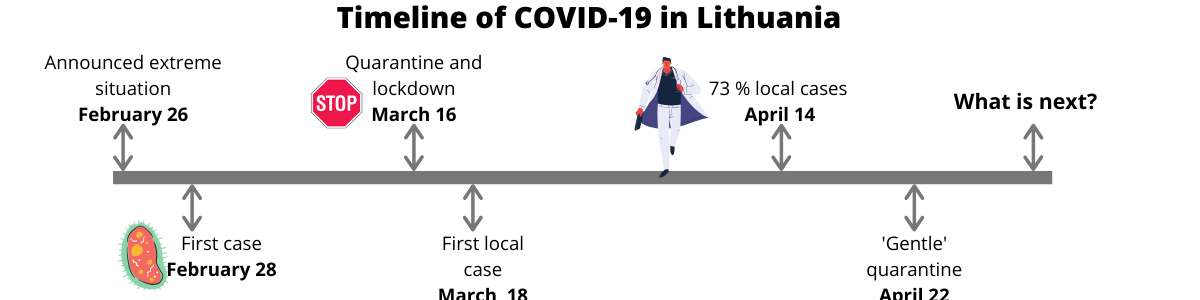

In [ ]:
fig = make_subplots(rows=2, cols=2,
                       subplot_titles=('Confirmed', 'Deaths', 'Recovered', 'Active cases'))

fig.add_trace(go.Bar(x = lithuania_data.index, y = lithuania_data['Confirmed']), 1, 1)
fig.add_trace(go.Bar(x = lithuania_data.index, y = lithuania_data['Deaths']), 1, 2)
fig.add_trace(go.Bar(x = lithuania_data.index, y = lithuania_data['Recovered']), 2, 1)
fig.add_trace(go.Bar(x = lithuania_data.index, y = lithuania_data['Active cases']), 2, 2)

fig.update_layout(height = 1000, width = 1000, title_text ='COVID-19 cases by categories in Lithuania', showlegend = False)
fig.show()

# After Easter we can see a slight rising of new cases. 
# Till april 10th, Lithuanian goverment addmited that is difficult to draw a line between active and recovery cases.
# In Lithuania we also can suspect that active cases reached Plateu phase and number of case will be decreasing.


# Conclusions:
## 1. Now in global scale we have 3506729 confirmed cases, 2134023 active cases, 247470 death cases, 1125236 recovery cases.
## 2. Most affected countries by active cases: US, UK, Russia, Italy, France.
## 3. Biggest death numbers we can see in US, least deaths in Russia.
## 4. In Lithuania we have 729 active cases, now we can see decreasing in cases. 